#                                               Global CO2 Emission Project

### Our World is dying because of us. We are making this world unhygenic, polluted and unappropriate to live. All of these because of Carbon Dioxide release. We are making our world polluted by releasing Co2 from factories, mills, transporations and deforestration. 

<img src="images/air pollution.jpg" width="500" height="200">

### The number of Carbon Dioxide is increasing day by day and it is melting our earth, destroying earths atmosphere. Also this increasing number of CO2 makes our climate to change and increases temperature. 

<img src="images/illustration-global-warming-concept_53876-20557.jpg" width="500" height="200">

### We are not aware of that C02 emission is one of the reason of Greenhouse Effect

<img src="images/Illustration-of-the-greenhouse-effect.png" width="500" height="200">

### C02 influences Global warming as well as Climate Change

<img src="images/kowition170600038.jpg" width="500" height="100">

### People cutting trees reduced the Biological Carbon Cycle. So, the number is increasing.

<img src="images/3a83498fa1e3b4058543bce678da55c6.png" width="500" height="500">

## Now after realising those pictures, to make a clear estatement of this serious situation and obligation of mankind, we would like to show how CO2 is increasing day by day and how it can destroy our future by making a relation with Greenhouse effect dataset. We would like to propose a estimated solution for that. Thus, we will be using three hypothesises. 

# First Hypothesis is for prediction the CO2 Emission untill 2030

# Second Hypothesis is for corelation with Greenhouse. Can CO2 influence Greenhouse?

# Third Hypothesis is, Can Trees be a solution of CO2 Emission?

# About Datasets 

We are using 2 datasets for first 2 hypothesis.

First Dataset: Global, Regional, and National Fossil-Fuel CO2 Emissions.(1751-2014) https://cdiac.ess-dive.lbl.gov/trends/emis/overview_2014.html
    
    
Second Dataset: CO2 and GHG emission data of different countries from (1750 - 2019) https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data
    

For third hypothesis, we are using a reference of CO2 Meter.com and european Energy Agency as they predict "A typical hardwood tree can absorb as much as 48 pounds of carbon dioxide per year. This means it will sequester approximately 1 ton of carbon dioxide by the time it reaches 40 years old." We are going to use this as a calculation of our hypothesis.

https://www.co2meter.com/blogs/news/could-global-co2-levels-be-reduced-by-planting-trees
https://www.eea.europa.eu/articles/forests-health-and-climate-change/key-facts/trees-help-tackle-climate-change

# Project Scope

This project will focus on CO2 and impact of CO2 that how it affects our life.




# Hypothesis 1

# How much will be the amount of CO2 in the world in 2030?

### In this case, our target will be use the CO2 data we have (1751-2014) and predict untill 2030.

All the estimations in the dataset is expresssed in  million metric tons of carbon. To
convert these estimates to units of carbon dioxide (CO2), simply multiply, these estimates by 3.667.

There will be 5 stages involved in this project:
    1. Preprocessing
    2. Data Visulizationn
    3. Prediction
    4. Calculation
    5. Discussion and Conclusion

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import itertools
import statsmodels.tsa.api as smt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults
from datetime import datetime
import seaborn as sns
%matplotlib inline

#Set style
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7
#To ignore some unimportant arnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set style
sns.set()
rcParams['figure.figsize'] = 12, 7

### Stage 1 : Preprocessing
The steps involved in this stage are:
    
    1. Loading the dataset
    2. Examining Data
    3. Changing Column Names
    4. Data Exploration
    5. Check data types 
    6. Fill missing values
    7. Looing for outliers
    8. Finishing Data Checks & Confirmation
    9. Changing "Year" column to Date Format and Setting as Index
    

##### Loading dataset

In [3]:
#importing Dataset 
data = pd.read_csv(r"C:\Users\tahmi\Documents\GitHub\ProgrammingForDataScienceProject\Data\global.1751_2014.csv")

##### Examining Data

In [4]:
data.head(10)

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,1.068
1,1752,3,0,0,3,0,0,1.068
2,1753,3,0,0,3,0,0,1.068
3,1754,3,0,0,3,0,0,1.068
4,1755,3,0,0,3,0,0,1.068
5,1756,3,0,0,3,0,0,1.068
6,1757,3,0,0,3,0,0,1.068
7,1758,3,0,0,3,0,0,1.068
8,1759,3,0,0,3,0,0,1.068
9,1760,3,0,0,3,0,0,1.068


In [5]:
data.tail(10)

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
254,2005,8042,1485,3068,3108,320,60,1.23
255,2006,8336,1534,3091,3293,356,62,1.26
256,2007,8503,1562,3071,3422,382,66,1.27
257,2008,8776,1630,3103,3587,388,69,1.30
258,2009,8697,1584,3042,3590,415,66,1.27
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36
263,2014,9855,1823,3280,4117,568,68,1.36


In [6]:
#Execution Code
print(data.shape)

(264, 8)


##### Changing Column Names

We would like to keep the columns names in our dataset to remember easily, so we need to set our column names as shortened names

In [7]:
#Code execution
data.rename(columns={'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)': 'Total','Carbon emissions from gas fuel consumption':'Gas','Carbon emissions from liquid fuel consumption':'Liquids', 'Carbon emissions from solid fuel consumption':'Solids','Carbon emissions from cement production':'Cements', 'Carbon emissions from gas flaring':'Gas Flaring','Per capita carbon emissions (metric tons of carbon; after 1949 only)':'Per Capita'}, index={'ONE': 'one'}, inplace=True)

##### Data Exploration

In [8]:
#Check the result
data.head()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,1.068
1,1752,3,0,0,3,0,0,1.068
2,1753,3,0,0,3,0,0,1.068
3,1754,3,0,0,3,0,0,1.068
4,1755,3,0,0,3,0,0,1.068


We can see first 5 rows of datasets which means our dataset starts from the year 1751.

In [9]:
data.tail()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring,Per Capita
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36
263,2014,9855,1823,3280,4117,568,68,1.36


We just checked out ending rows to see which year the dataset ends. It shows we have data untill 2014.

##### Checking Data Types

In [10]:
#Looking at all of the columns and getting info
#Code Execution
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         264 non-null    int64  
 1   Total        264 non-null    int64  
 2   Gas          264 non-null    int64  
 3   Liquids      264 non-null    int64  
 4   Solids       264 non-null    int64  
 5   Cements      264 non-null    int64  
 6   Gas Flaring  264 non-null    int64  
 7   Per Capita   264 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 18.6 KB


In [11]:
#checking data
data.dtypes

Year             int64
Total            int64
Gas              int64
Liquids          int64
Solids           int64
Cements          int64
Gas Flaring      int64
Per Capita     float64
dtype: object

Looking at the above data informaion, we only have numeric values so we do not need to do any data formatting or no need to change the data types. The Data shows that there are 264 rows with 7 columns. The data types of each columns are int64 except Per Capita which represents float64 as there is fractional number which is fine to have. We are not using that column.

##### Filling Missing Values

In [12]:
#data is numeric, fill missing values with mean
data['Per Capita'].fillna(data['Per Capita'].mean(),inplace=True)

##### Looking for outliers

Now we should look how the data look likes or is there any outliers or not.

Text(0.5, 0, 'Gas Flaring')

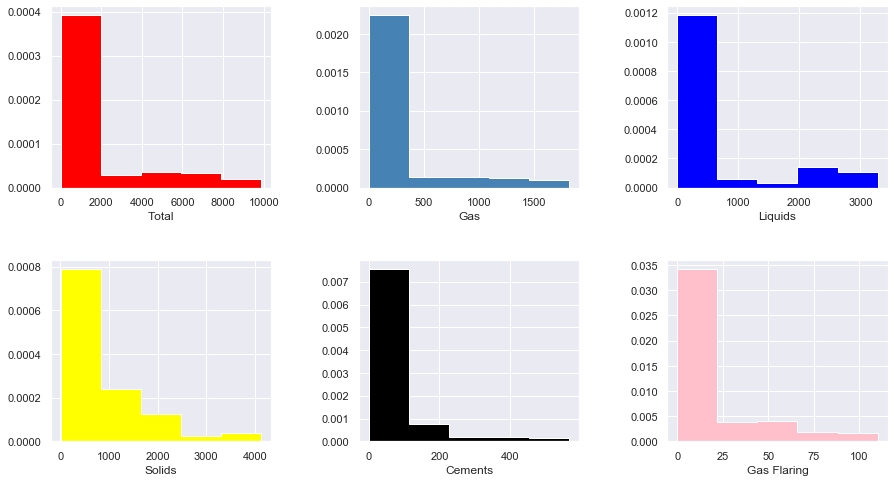

In [13]:
#Code execution\n",
plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(231)
plt.hist( data['Total'],bins=5, density=True,histtype='stepfilled',color='red')
plt.xlabel("Total")
    
    
plt.subplot(232)
plt.hist( data['Gas'],bins=5, density=True,histtype='stepfilled',color='steelblue')
plt.xlabel("Gas")

plt.subplot(233)
plt.hist( data['Liquids'],bins=5, density=True,histtype='stepfilled',color='blue')
plt.xlabel("Liquids")
    
plt.subplot(234)
plt.hist( data['Solids'],bins=5, density=True,histtype='stepfilled',color='yellow')
plt.xlabel("Solids")
    
plt.subplot(235)
plt.hist(data['Cements'],bins=5, density=True,histtype='stepfilled',color='black')
plt.xlabel("Cements")
    
plt.subplot(236)
plt.hist( data['Gas Flaring'],bins=5, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Gas Flaring")

Above histograms show that our data are on a finer scale. Additionally, there are few outliers which can be ignored.

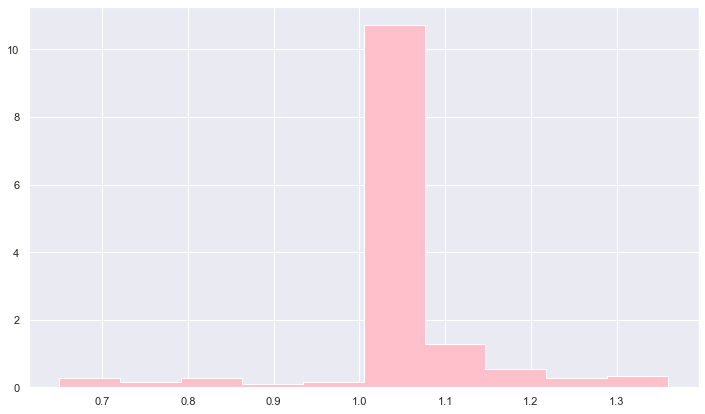

In [14]:
data['Per Capita'].hist(bins=10,density=True,histtype='stepfilled',color='pink')

As can be seen in the histogram plot above,no outliers are displyed on the plot but there is something wrong with the Y-axis.So we went through our source file and found out that data for global per capita are not available before 1950 and emission estimates are expressed in metric tons of carbon.And also,it was not added to on top of Total carbon emissions. 

##### Finishing Data Checks & Confirmation

In [15]:
#There is no missing values
data.isna().sum()

Year           0
Total          0
Gas            0
Liquids        0
Solids         0
Cements        0
Gas Flaring    0
Per Capita     0
dtype: int64

In [16]:
#return size of rows and cols
data.shape

(264, 8)

In [17]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            254, 255, 256, 257, 258, 259, 260, 261, 262, 263],
           dtype='int64', length=264)

In [18]:
data.columns

Index(['Year', 'Total', 'Gas', 'Liquids', 'Solids', 'Cements', 'Gas Flaring',
       'Per Capita'],
      dtype='object')

In [19]:
data.dtypes

Year             int64
Total            int64
Gas              int64
Liquids          int64
Solids           int64
Cements          int64
Gas Flaring      int64
Per Capita     float64
dtype: object

In [20]:
#find missing values
data.isna().sum()

Year           0
Total          0
Gas            0
Liquids        0
Solids         0
Cements        0
Gas Flaring    0
Per Capita     0
dtype: int64

There is no missing values in our global dataset

In [21]:
data.notnull()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring,Per Capita
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
259,True,True,True,True,True,True,True,True
260,True,True,True,True,True,True,True,True
261,True,True,True,True,True,True,True,True
262,True,True,True,True,True,True,True,True


We can see that our data looks fine, all columns count is at 264. This means that there are no missing values and we can move forward to further progress.

##### Changing "Year" column to Date Format and Setting as Index

In [22]:
#Execution code
data.Year = pd.to_datetime(data.Year, format='%Y')

In [23]:
#Check result code
data.dtypes

Year           datetime64[ns]
Total                   int64
Gas                     int64
Liquids                 int64
Solids                  int64
Cements                 int64
Gas Flaring             int64
Per Capita            float64
dtype: object

In [24]:
#Check result code
data.dtypes

Year           datetime64[ns]
Total                   int64
Gas                     int64
Liquids                 int64
Solids                  int64
Cements                 int64
Gas Flaring             int64
Per Capita            float64
dtype: object

##### Set Date as index

In [25]:
#Execution code
data = data.set_index('Year')

In [26]:
#Check result code
data.head()

,Total,Gas,Liquids,Solids,Cements,Gas Flaring,Per Capita
Year,,,,,,,
1751-01-01,3,0,0,3,0,0,1.068
1752-01-01,3,0,0,3,0,0,1.068
1753-01-01,3,0,0,3,0,0,1.068
1754-01-01,3,0,0,3,0,0,1.068
1755-01-01,3,0,0,3,0,0,1.068


# Stage 2:Data Analysis

The steps involved in this stage are:
        1. Basic Data Analysis
        2. Visualization Analysis
        3. Time-Series Decomposiion

## Basic Data Analysis 

In [27]:
#Execution code
data.describe()

,Total,Gas,Liquids,Solids,Cements,Gas Flaring,Per Capita
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1522.984848,209.166667,536.609848,721.541667,41.723485,13.969697,1.068076
std,2444.152273,439.181345,984.092272,949.056349,99.373720,27.029892,0.091050
min,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.650000
25%,13.750000,0.000000,0.000000,13.750000,0.000000,0.000000,1.068000
50%,264.000000,0.000000,4.000000,260.500000,0.000000,0.000000,1.068000
75%,1431.500000,77.250000,362.500000,1064.750000,14.500000,0.000000,1.068000
max,9855.000000,1823.000000,3280.000000,4126.000000,568.000000,110.000000,1.360000


We can see that our data looks fine, all columns count is at 264. This means that there are no missing values.
We can also use the mean from each soucre to find the CO2 distributions, which will later on be used for computaions.

In [28]:
#Setting Mean of Each Column
#Execution Code
Total = 1522

GasCol_mean = 209
LiquidsCol_mean = 536
SolidsCol_mean = 721
CementsCol_mean = 41
GasFlaringCol_mean = 13


TotalCol = np.array([GasCol_mean,LiquidsCol_mean,SolidsCol_mean,CementsCol_mean,GasFlaringCol_mean])
percentages = TotalCol/Total

percentages

array([0.13731932, 0.3521682 , 0.47371879, 0.02693824, 0.00854139])

## Visualization Analysis

To get a clear picture of what is going on with the data, it is best to use plots and do visualization analysis.

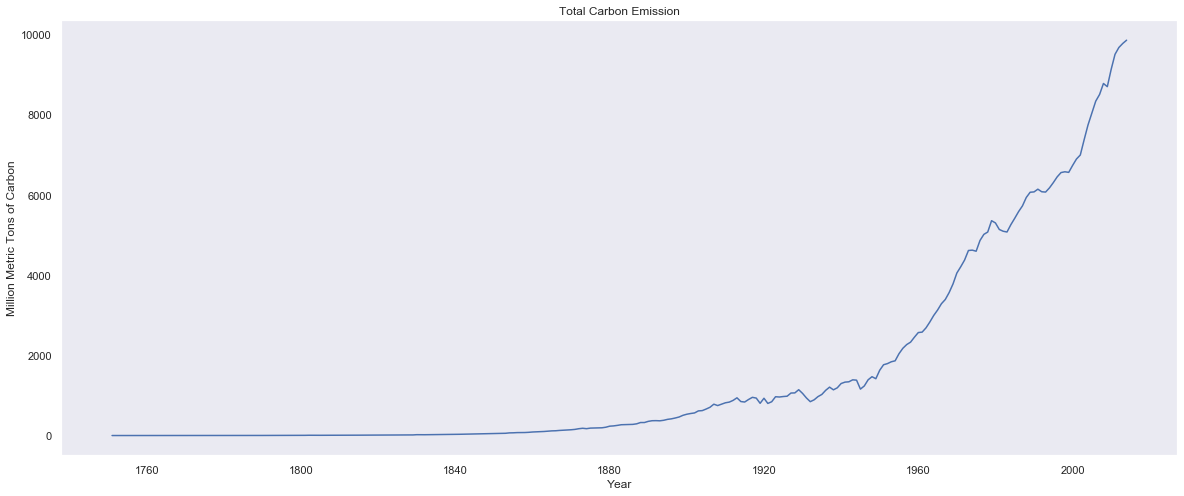

In [29]:
#Visualizing code
plt.figure(figsize=(20, 8))
plt.plot(data.Total)
plt.title('Total Carbon Emission')
plt.ylabel('Million Metric Tons of Carbon')
plt.xlabel('Year')
plt.grid(False)
plt.show()

The carbon distribution seems to follow a pattern or we can say a trend. It goes up at the beginning of the year unil the end of it.

Above graph displys that the carbon consumption fluctuated between 1920 and 1960. Form 1960, the trend line dramatically increased at the end of the period.

# Clearly, you see that this is not a **stationary process**, and it is hard to tell if there is some kind of **seasonality**.

**++Some Theories on Time Series++**

**Autocorrelation** 
Informally, autocorrelation is the similarity between observations as a function of the time lag between them.  For example, the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.

**Seasonality** refers to **periodic** fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.

**Stationarity** is an important characteristic of time series. A time series is said to be stationary if its **statistical properties do not change over time**. In other words, it has constant mean and variance, and covariance is independent of time.

Often, **Total CO2 Emission are not a stationary** process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
**Ideally, we want to have a stationary time series** for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

How to test if a process is stationary is to use **"Dickey-Fuller"** test where p > 0 indicates a non-stationary seris and p = 0 indicates staionary series. 


**++Modeling time series theories++**

There are many ways to model a time series in order to make predictions. 
- moving average
- exponential smoothing
- double exponential smoothing
- ARIMA (SARIMA)

**Moving Average**
The moving average model is probably the most naive approach to time series modelling. This model simply states that **the next observation is the mean of all past observations.**   Thus doing moving average, you need to specify the **time window** where you do average.

**Exponential smoothing**
Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, **less importance is given to observations as we move further from the present.**  Alpha is a smoothing factor that takes values between 0 and 1 and determines how fast the weight decreases.

**Double exponential smoothing**
Double exponential smoothing is used when there is a trend in the time series. In that case, we use this technique, which is simply a **recursive use of exponential smoothing twice**.  Beta is the trend smoothing factor and takes values between 0 and 1.

**Triple exponential smoothing**
This method extends double exponential smoothing, by **adding a seasonal smoothing factor**. Of course, this is useful if you notice seasonality in your time series.  Gamma is the seasonal smoothing factor and L is the length of the season.

**Seasonal autoregressive integraded moving average model (SARIMA)**
SARIMA is actually the **combination of simpler models to make a complex model that can model time series exhibiting non-stationary properties and seasonality**.

1. At first, we have the **autoregression model AR(p)**. This is basically a regression of the time series onto itself. Here, we assume that the current value depends on its previous values with some lag. It takes a **parameter p which represents the maximum lag.**

2. Then, we **add the moving average model MA(q)**. This takes a parameter **q which represents the biggest lag after which other lags are not significant on the autocorrelation plot**.

3. After, we add the **order of integration I(d)**. The parameter d represents the number of differences required to make the series stationary.

4. Finally, we add the final component: **seasonality S(P, D, Q, s)**, where s is simply the season’s length. Furthermore, this component requires the parameters P and Q which are the same as p and q, but for the seasonal component. Finally, D is the order of seasonal integration representing the number of differences required to remove seasonality from the series.

**The main takeaway from this is that before modelling with SARIMA, we must apply transformations to our time series to remove seasonality and any non-stationary behaviors.**
https://machinelearningmastery.com/time-series-data-stationary-python/
https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322
https://www.investopedia.com/articles/trading/07/stationary.asp


# Time-series decomposition
This is a technique called 'Time Series Decomposition', it can be used to help analyze our the data's trend, seasonality and noise and  it helps to improve forecast accuracy

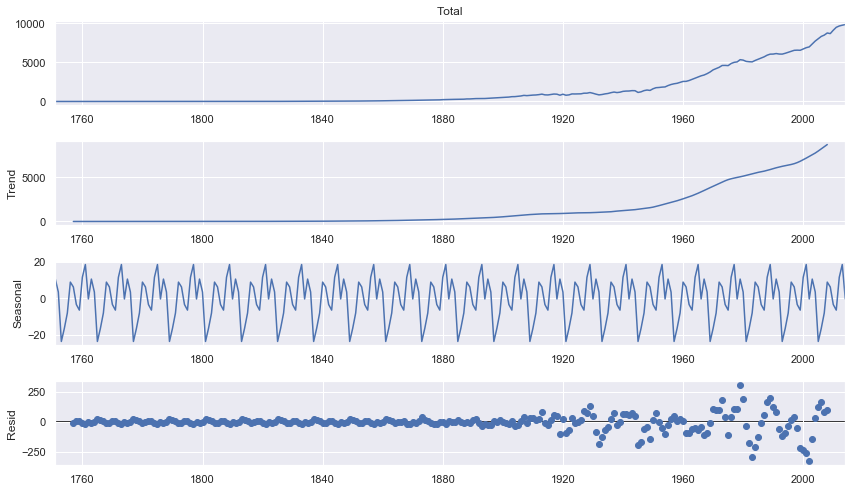

In [30]:
#Visualizing code
decomposition = smt.seasonal_decompose(data['Total'], model='additive', freq=12)
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the emissions of carbon is unstable, along with its obvious seasonality.The graph shows that seasonality has an effect on Carbon emissions. This proves that something is causing the carbon emissions to go up and down regularly.

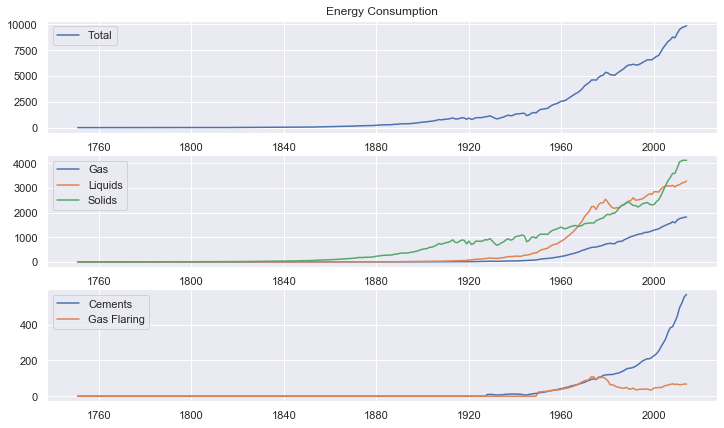

In [31]:
#Visualizing code\n",
    
fig,ax = plt.subplots(3)
ax[0].set_title('Energy Consumption')
ax[0].plot(data['Total'],label='Total')
ax[1].plot(data['Gas'],label='Gas')
ax[1].plot(data['Liquids'],label='Liquids')
ax[1].plot(data['Solids'],label='Solids')
ax[2].plot(data['Cements'],label='Cements')
ax[2].plot(data['Gas Flaring'],label='Gas Flaring')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

As can be observed from the graphs, the carbom emission frm gas flaring is pretty samll compared to other sources through the years. Moreover, Liquids and Solids emission are not following same trend as other column are look like. Research needed to be done on this.

And we can see that the data of total carbon emissions from different sources and data of each source are leading up.

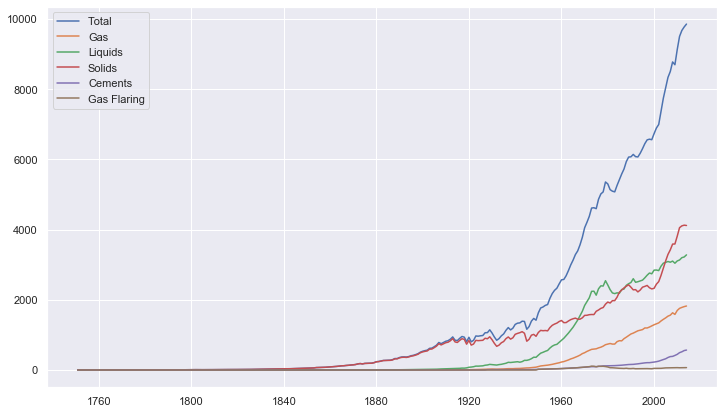

In [32]:
#Visualizing code
plt.figure()
ax = plt.axes()
ax.plot(data['Total'], label='Total')
ax.plot(data['Gas'], label='Gas')
ax.plot(data['Liquids'], label='Liquids')
ax.plot(data['Solids'], label='Solids')
ax.plot(data['Cements'], label='Cements')
ax.plot(data['Gas Flaring'], label='Gas Flaring')
ax.legend();

As we can see the whole line graph, we see that total line is high trendy. But from all the column Solids & Liquids Sources has higher trend than any other column. 

                Total       Gas   Liquids    Solids   Cements  Gas Flaring  \
Total        1.000000  0.980191  0.985649  0.978192  0.933449     0.836841   
Gas          0.980191  1.000000  0.968501  0.934474  0.965383     0.765430   
Liquids      0.985649  0.968501  1.000000  0.934823  0.892105     0.881391   
Solids       0.978192  0.934474  0.934823  1.000000  0.907870     0.786391   
Cements      0.933449  0.965383  0.892105  0.907870  1.000000     0.689790   
Gas Flaring  0.836841  0.765430  0.881391  0.786391  0.689790     1.000000   
Per Capita   0.419056  0.496573  0.415957  0.354345  0.542313     0.245659   

             Per Capita  
Total          0.419056  
Gas            0.496573  
Liquids        0.415957  
Solids         0.354345  
Cements        0.542313  
Gas Flaring    0.245659  
Per Capita     1.000000  


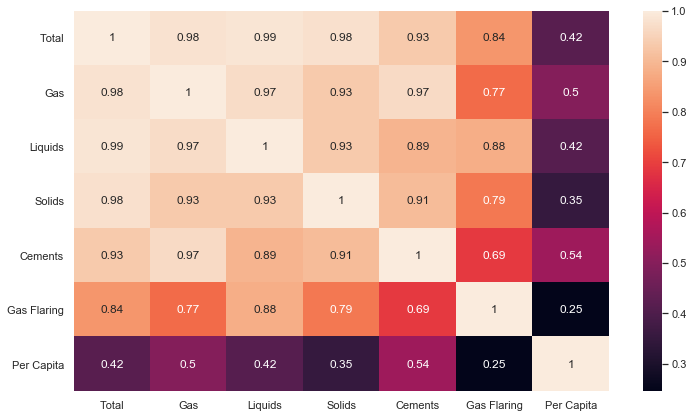

In [33]:
corrMatrix = data.corr()
print (corrMatrix)
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

As we stated before, our Total Column has highest corelation with Liquids(0.99) , Gas(0.98), Solids(0.98), Cements(0.93) and Gas Flaring(0.84) sequentially.  So, we are going to use these columns and ignoring Per Capita Column for low score (0.42).

# Stage 3 : Forecasting

Models that will be used: Moving Average, Exponential Smoothing, Double Exponential Smoothing, Triple Exponential Smoothing Moving Average (TESMA) , Autoregressive Moving Average (ARMA), and Seasonal Autoregressive Integrated Moving Average (SARIMA).

The steps involved in this stage are:
    1. Creating the models
    2. Comparing the models

# Creating the Models

# Moving average

Let’s use the **moving average model** to smooth our time series. For that, we will use a helper function that will run the moving average model on a specified time window and it will plot the result smoothed curve:

In [34]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

Now, using a time window of 5 days, we see:

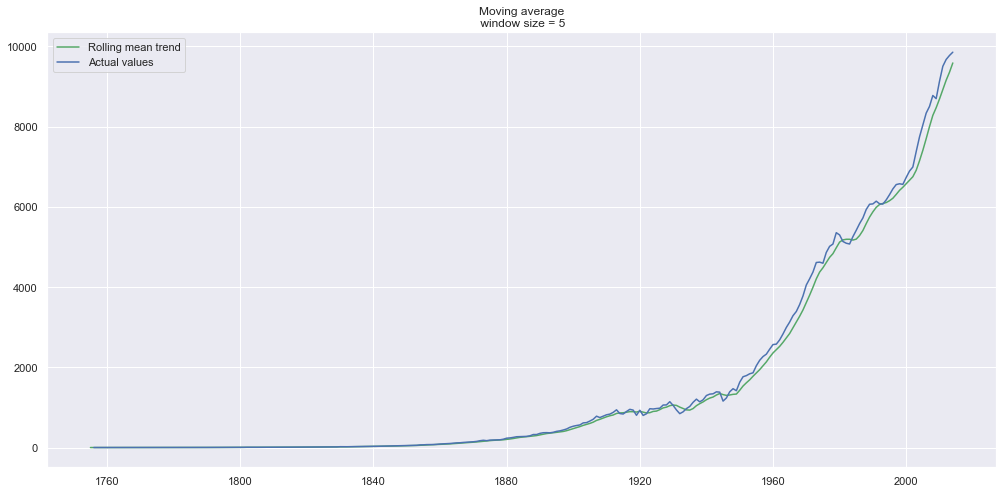

In [35]:
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Total, 5)

As you can see, we can hardly see a trend, because it is too close to actual curve. Let’s see the result of smoothing by the **previous month**, and **previous quarter**.

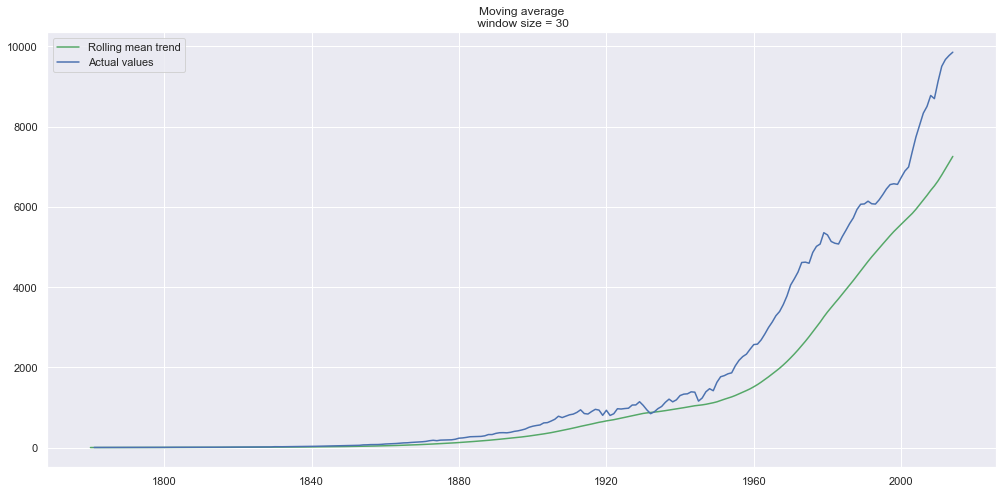

In [36]:
#Smooth by the previous month (30 days)
plot_moving_average(data.Total, 30)

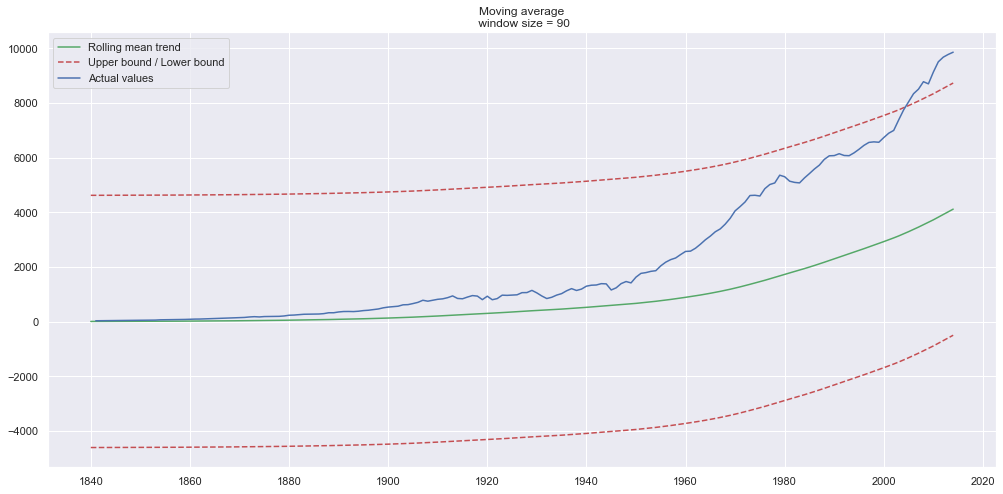

In [37]:
#Smooth by previous quarter (90 days)
plot_moving_average(data.Total, 90, plot_intervals=True)

Trends are easier to spot now. **Notice how the 30-day and 90-day trend show a downward curve at the end.** This might mean that the stock is likely to go down in the following days.

# Exponential smoothing

In [38]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [39]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

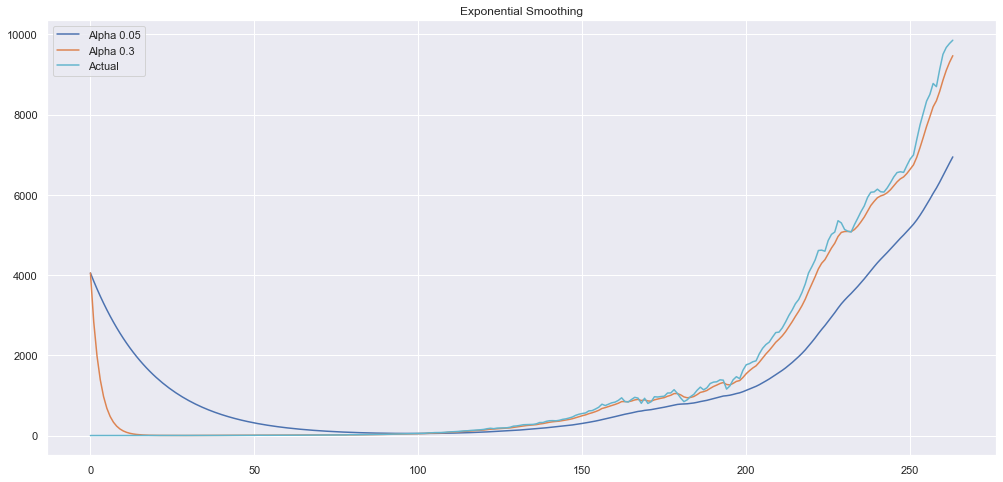

In [40]:
plot_exponential_smoothing(data.Total, [0.05, 0.3])

# Double exponential smoothing 

Now, let’s use double exponential smoothing:

In [41]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [42]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

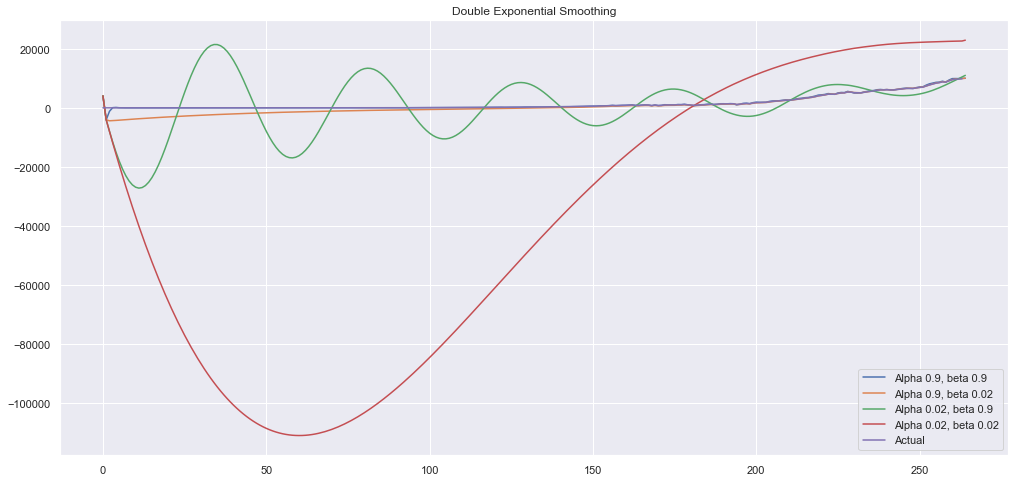

In [43]:
plot_double_exponential_smoothing(data.Total, alphas=[0.9, 0.02], betas=[0.9, 0.02])

# Triple Exponential Smoothing Moving Average

Triple Exponential Smoothing Moving Average is a good model to set our baseline on, since this model is basically moving average model that takes into account the data's weight, trend, and seasonality. It also has another name, Holt Winter’s Exponential Smoothing or (HWES).

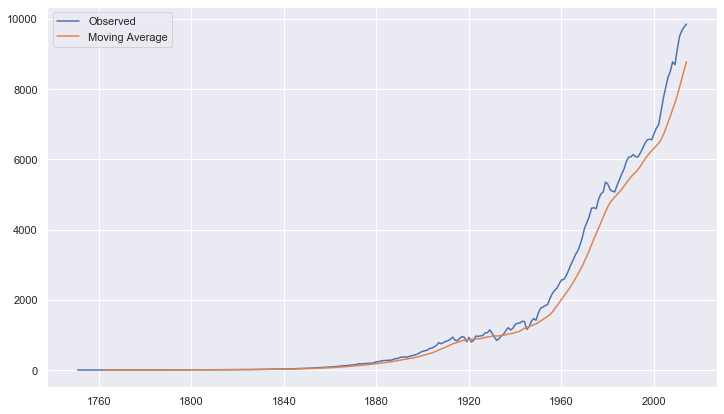

In [44]:
#Execution Code\n",
moving_avg = data.rolling(12).mean()
plt.figure()
plt.plot(data['Total'], label= 'Observed')
plt.plot(moving_avg['Total'], label= 'Moving Average')
plt.legend();

The graph illustrated above is the moving average of our data in the time frame of 12 months. This graph can help us understand the direction of where our data is heading. But it is very crude and can only predict simple directions. However, this graph shows the basis in which our Triple Exponential Smoothing Moving Average is built upon.

Now we can start building our Triple Exponential Smoothing Moving Average model. We will be using TESMA as it's abbreviation.

In [45]:
#Surpress Warnings
warnings.filterwarnings('ignore')

#Execution Code
model = ExponentialSmoothing(data['Total'],trend='additive')
model_TESMA = model.fit()
pred = HoltWintersResults.predict(model_TESMA,start='1751-01-01', end='2014-01-01')
temp = data.copy()
temp['pred'] = pred

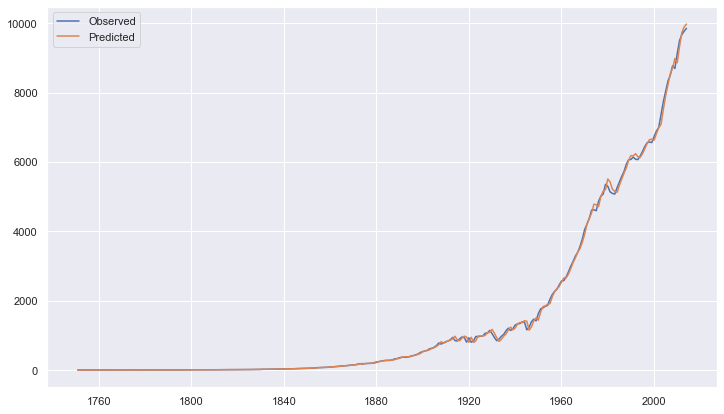

In [46]:
#Visualizing code
plt.figure()

plt.plot(data['Total'], label='Observed')
plt.plot(temp['pred'], label='Predicted')

plt.legend();

As can be seen from the graph, our predicted data is very similar to the observed data. This indicates that the accuracy for the model is fairly high.

# Seasonal Autoregressive Integrated Moving Average

## Seasonal Autoregressive Integrated Moving Average or SARIMA is one of the best model developed for time series. Which is why we are also using it. But We cant do SARIMA without Stationaring.

## Clearly, you see that our data is not a **stationary process**, and Now it is clear to tell if there is some kind of **seasonality**.

**++Some Theories on Time Series++**

**Autocorrelation** 
Informally, autocorrelation is the similarity between observations as a function of the time lag between them.  For example, the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.

**Seasonality** refers to **periodic** fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.

**Stationarity** is an important characteristic of time series. A time series is said to be stationary if its **statistical properties do not change over time**. In other words, it has constant mean and variance, and covariance is independent of time.

Often, **Total CO2 Emission are not a stationary** process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
**Ideally, we want to have a stationary time series** for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

How to test if a process is stationary is to use **"Dickey-Fuller"** test where p > 0 indicates a non-stationary seris and p = 0 indicates staionary series. 


**++Modeling time series theories++**

There are many ways to model a time series in order to make predictions. 
- moving average
- exponential smoothing
- double exponential smoothing
- ARIMA (SARIMA)

**Moving Average**
The moving average model is probably the most naive approach to time series modelling. This model simply states that **the next observation is the mean of all past observations.**   Thus doing moving average, you need to specify the **time window** where you do average.

**Exponential smoothing**
Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, **less importance is given to observations as we move further from the present.**  Alpha is a smoothing factor that takes values between 0 and 1 and determines how fast the weight decreases.

**Double exponential smoothing**
Double exponential smoothing is used when there is a trend in the time series. In that case, we use this technique, which is simply a **recursive use of exponential smoothing twice**.  Beta is the trend smoothing factor and takes values between 0 and 1.

**Triple exponential smoothing**
This method extends double exponential smoothing, by **adding a seasonal smoothing factor**. Of course, this is useful if you notice seasonality in your time series.  Gamma is the seasonal smoothing factor and L is the length of the season.

**Seasonal autoregressive integraded moving average model (SARIMA)**
SARIMA is actually the **combination of simpler models to make a complex model that can model time series exhibiting non-stationary properties and seasonality**.

1. At first, we have the **autoregression model AR(p)**. This is basically a regression of the time series onto itself. Here, we assume that the current value depends on its previous values with some lag. It takes a **parameter p which represents the maximum lag.**

2. Then, we **add the moving average model MA(q)**. This takes a parameter **q which represents the biggest lag after which other lags are not significant on the autocorrelation plot**.

3. After, we add the **order of integration I(d)**. The parameter d represents the number of differences required to make the series stationary.

4. Finally, we add the final component: **seasonality S(P, D, Q, s)**, where s is simply the season’s length. Furthermore, this component requires the parameters P and Q which are the same as p and q, but for the seasonal component. Finally, D is the order of seasonal integration representing the number of differences required to remove seasonality from the series.

**The main takeaway from this is that before modelling with SARIMA, we must apply transformations to our time series to remove seasonality and any non-stationary behaviors.**
https://machinelearningmastery.com/time-series-data-stationary-python/
https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322
https://www.investopedia.com/articles/trading/07/stationary.asp

# Stationaring

We can only use SARIMA when our data is stationary. That is why we will now be using 'Dickey-Fuller' score to determine if our data is stationary or not. If the score is not 0 then the data is not stationary.

Note that stationaring the data is essentially making sure the every point of the data input's mean is equal to one another. Essentially making sure that the way the data changes over time does not change with time.

When the data is stationary it means that the data can still change overtime, however the way it changes overtime cannot change.

We do ADF test to check whether our data is stainonary or not.

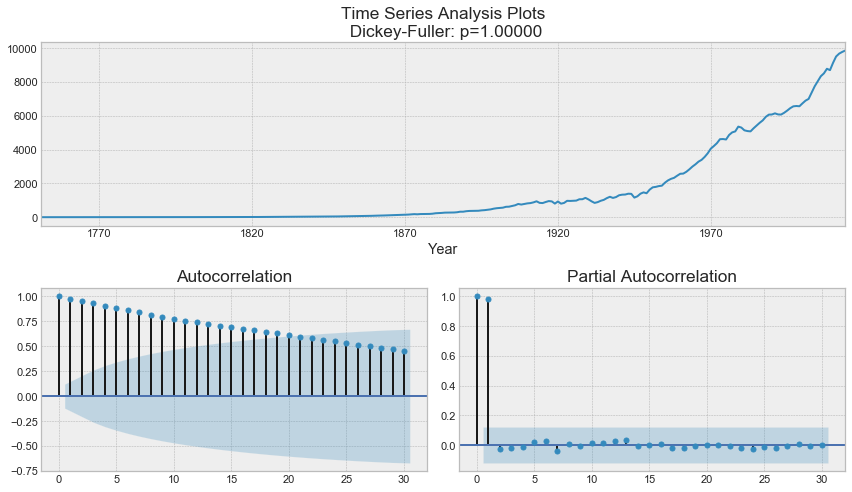

In [47]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def tsplot(y, lags=None):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data['Total'], lags=30)


Our score is 1.00, this means that our data is not stationary.

SARIMA model will automatically stationarize the data for us, however we will be also doing it manually which can to help us understand the processes better.

We can achieve this by finding the difference between different time shifts or lags.

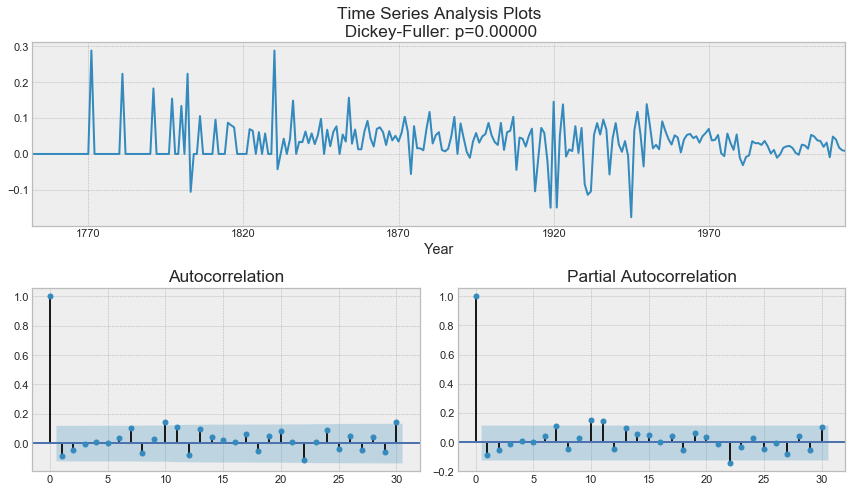

In [48]:
data['Total_log'] = np.log(data['Total'])
data_diff = data['Total_log'] - data['Total_log'].shift(1)
tsplot(data_diff[1:], lags=30)

After using log transform to stablize the non-constant variance of a series, our data is stationary at 0.

# To use SARIMA we need to find it's hypterparameter p d and q.

p is the data's seasonality, d is the data's trend, and q is the residuals or anomalies of the data.

We are basically trying to find the hyper parameters that can make the data stationary for our SARIMA model.

In [49]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

We created a list of all of the parameter's combination and used a function to find the one that best fits our model.


In [50]:
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data.Total, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

The function above is for finding the parameters that can create a mode with the least amount of AIC score.

AIC score stands for Akaike information criterion, and is a score developed and widely used for comparing models performance. It also helps prevent the model from being too overfitted to our dataset.


In [51]:
#Set parameters that give the lowest AIC (Akaike Information Criteria)

p, q, P, Q = result_table.parameters[0]

model_SARIMA = sm.tsa.statespace.SARIMAX(data.Total, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(model_SARIMA.summary())

                                          SARIMAX Results                                           
Dep. Variable:                                        Total   No. Observations:                  264
Model:             SARIMAX(1, 1, 2)x(2, 1, [1, 2, 3, 4], 5)   Log Likelihood               -1451.213
Date:                                      Tue, 02 Jun 2020   AIC                           2922.426
Time:                                              02:19:05   BIC                           2957.956
Sample:                                          01-01-1751   HQIC                          2936.713
                                               - 01-01-2014                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.077  

Now that our model has been built we can use the built in diagnostics method to see the statistics of our model.

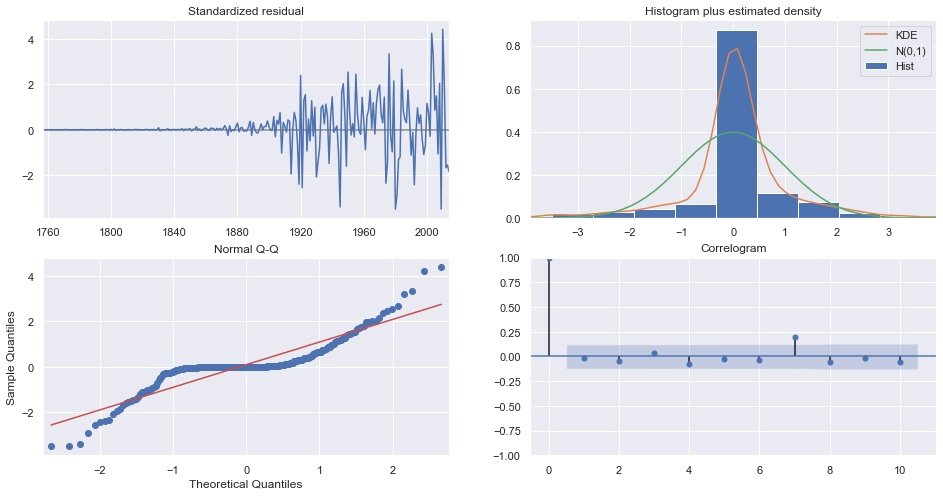

In [52]:
#Visualizing code
model_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

The system diagnostics shows that everything seems fine with our SARIMA model.


One of the many advantages that SARIMA model has over other models is that it has a variety of useful methods. One example is that we can plot our prediction's confidence level.

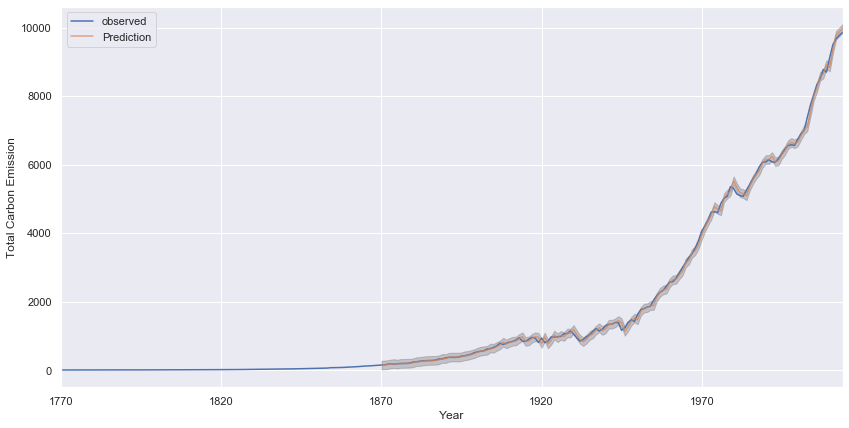

In [53]:
#Visualizing code
pred = model_SARIMA.get_prediction(start=pd.to_datetime('1870-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data.Total['1770':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Total Carbon Emission')
plt.legend()
plt.show()

The same goes for our forecast's confidence level.

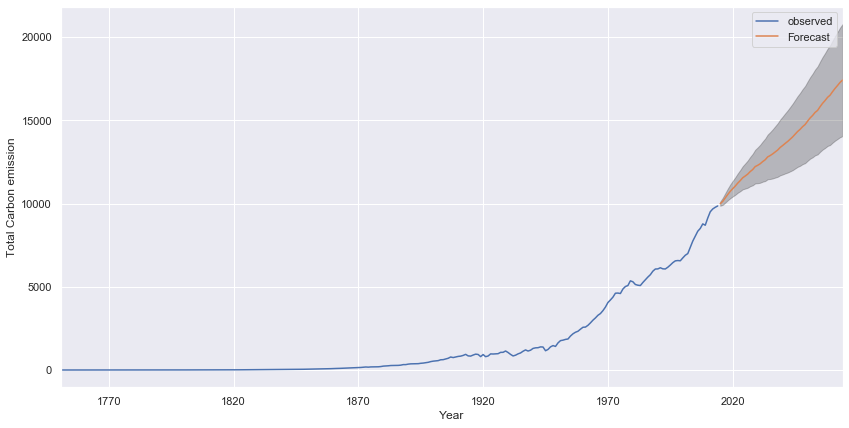

In [54]:
#Visualizing code
pred_uc = model_SARIMA.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = data.Total.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Total Carbon emission')
plt.legend()
plt.show()

The confidence of our forecast looks pretty good. It has a compact confidence level, which means that our model is quite accurate.

The graph also shows that the more we forecast into the future, the less accurate it will be. Which is very logical, the more you try to move away from the present, the less accurate things will be.


# Autoregressive Moving Average

Autoregressive Moving Average model is a combination of 2 models. The Autoregressive model and the Moving Average model.

The AutoRegressive model uses a linear function to model the next step based on the previous steps.
The Moving Average model also uses a linear function, however it models it's next step based on the previous step's means.

Now we do again check data stationary using  ADF test

We will now build the Autoregressive Moving average model, shorted to ARMA.


from statsmodels.tsa.stattools import adfuller
X = data['Total'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')
#Surpress Warnings
warnings.filterwarnings('ignore')

#Execution Code
model = ARMA(data['Total'], order=(2, 1))
model_ARMA = model.fit(disp=False)
temp['pred2'] = model_ARMA.predict()

# Comparing the Models

In [55]:
#Execution Code
y_true = data['Total']
y_pred_TESMA = HoltWintersResults.predict(model_TESMA,start='1751-01-01', end='2014-01-01')
#y_pred_ARMA = model_ARMA.predict() 
y_pred_SARIMA = model_SARIMA.predict()

In [56]:
#Fiding the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
#Finding the MAPA
Accuracy_TESMA = 100 - mean_absolute_percentage_error(y_true, y_pred_TESMA)
#Accuracy_ARMA = 100 - mean_absolute_percentage_error(y_true, y_pred_ARMA)
Accuracy_SARIMA = 100 - mean_absolute_percentage_error(y_true, y_pred_SARIMA)

print('TESMA: ',Accuracy_TESMA)
#print('ARMA: ',Accuracy_ARMA)
print('SARIMA: ',Accuracy_SARIMA)

TESMA:  96.44304343065899
SARIMA:  95.88476765491632


It seems that the model with the highest accuracy is TESMA followed by SARIMA.


Based on the accuracy score, we should be using the TESMA model. However, we should also take in to account the flexibility of the model, and ease of use. Also, one very important note is that SARIMA model automatically prevents overfitting by using the model with the lowest AIC score.

Taking everything into account, we decided to use the SARIMA model.

# Stage 4 : Calculation

For the calculation, we are going to use SARIMA model which will give us an estimated forecast of upcoming 16 years (16 steps) Total CO2 Emission untill 2030.
So, we are using forecast function untill 2030 to see how will be the amount CO2 in 2030 (million metric tons of C)

In [58]:
#Execution Code
best_model = model_SARIMA
forecast = best_model.forecast(steps=16)
print(forecast)

2015-01-01     9989.836133
2016-01-01    10129.051180
2017-01-01    10331.567422
2018-01-01    10538.607537
2019-01-01    10726.421530
2020-01-01    10891.392508
2021-01-01    11043.589814
2022-01-01    11221.710889
2023-01-01    11371.906166
2024-01-01    11544.289744
2025-01-01    11649.835773
2026-01-01    11762.164328
2027-01-01    11916.211438
2028-01-01    12037.958859
2029-01-01    12216.602414
2030-01-01    12293.312533
Freq: AS-JAN, dtype: float64


So, the SARIMA model helps us to see how will be situation in 2030. It shows after 2014 it will be high increase of Carbon Dioxide untill 2030.

In [59]:
#Execution Code
total = forecast['2030-1-1']
print(total)

12293.312532854294


Finally, we got the result of year 2030 which is around 12293 million metric tons of Carbon Dioxide.

Now we are going to find the each column percentages from Total Column in 2030. It will help us to understand how much each of the source influence the total number of CO2. The calculation is done by Percentages multiplied by total (Total amount of CO2 in 2030)
###### NOTE: You have to see BASIC DATA ANALYSIS part from DATA ANALYSIS stage. Then you will find vlaue of percentages

In [60]:
#Execution Code
calculated_e = percentages*total

Now we are going to create a pie chart to visualize each columns with percentages.

In [61]:
#Creating Pie Chart
pie = pd.DataFrame(columns={'Total'}, index=['Gas','Liquids','Solids','Cements','Gas Flaring'])
pie['Total'] = calculated_e

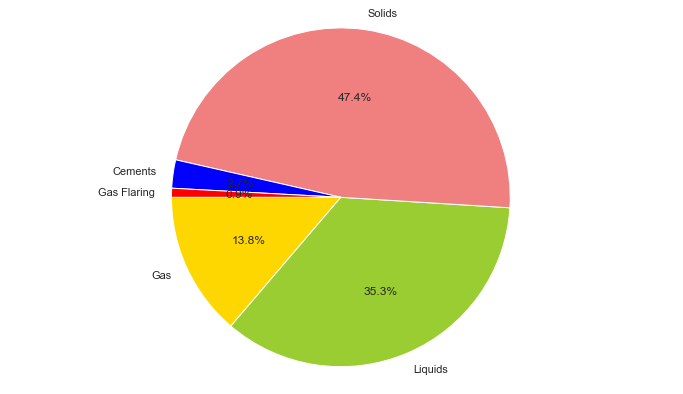

Sources of Total CO2 Emission in 2030


In [62]:
#Visualization Code

labels = 'Gas', 'Liquids', 'Solids', 'Cements', 'Gas Flaring'
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'red']

plt.pie(calculated_e, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=180)

plt.axis('equal')
plt.show()
print('Sources of Total CO2 Emission in 2030')

As resulted from the pie chart, it shows a percentages of different column which contributes to Total CO2 Emission column in 2030. From the pie, it shwows that higheset percentage of CO2 comes from Solids Fossil Fuel Sources (47.4%), next Liquids (35.3%), Gas (13.8%), Cements (2.7%) and Gas Flaring (0.9%) 

# Stage 5 : Discussion & Conclusion

In the conclusion, we can declare that in 2030 which is around 12293 million metric tons of Carbon Dioxide and higheset percentage of CO2 comes from Solids Fossil Fuel Sources (47.4%), next Liquids (35.3%), Gas (13.8%), Cements (2.7%) and Gas Flaring (0.9%). So, it shows that our earth is going to suffer a lot for the daily increasing CO2 emission which will be a big problem in the future. Also, Fossil Fuel Burns from Solids and Liquids are most affecting increment of CO2 in the atmosphere. 

# Hypothesis 2

# Second Hypothesis is for corelation with Greenhouse. Can CO2 influence Greenhouse?

In this hypothesis, we are simply going to check corelation between two datasets so that we can come up with an 'YES' or 'No' answer for corelation.

In [140]:
#importing Dataset 
gn = pd.read_csv(r"C:\Users\tahmi\Documents\GitHub\ProgrammingForDataScienceProject\Data\emission data.csv", index_col = ["Country"])

In [141]:
target = gn.T
print(target)

Country  Afghanistan        Africa      Albania       Algeria  \
1751             0.0  0.000000e+00          0.0  0.000000e+00   
1752             0.0  0.000000e+00          0.0  0.000000e+00   
1753             0.0  0.000000e+00          0.0  0.000000e+00   
1754             0.0  0.000000e+00          0.0  0.000000e+00   
1755             0.0  0.000000e+00          0.0  0.000000e+00   
...              ...           ...          ...           ...   
2010     100365175.0  3.421283e+10  237764288.0  3.132819e+09   
2011     112591192.0  3.541120e+10  243000144.0  3.252626e+09   
2012     123333249.0  3.664504e+10  247906240.0  3.380736e+09   
2013     133333663.0  3.789569e+10  252966224.0  3.513171e+09   
2014     143122849.0  3.918617e+10  258678400.0  3.656348e+09   

Country  Americas (other)     Andorra       Angola   Anguilla  \
1751         0.000000e+00         0.0          0.0        0.0   
1752         0.000000e+00         0.0          0.0        0.0   
1753         0.000000e+0

In [142]:
target.World

1751    9.350528e+06
1752    1.870472e+07
1753    2.805891e+07
1754    3.741677e+07
1755    4.677829e+07
            ...     
2010    1.330000e+12
2011    1.360000e+12
2012    1.400000e+12
2013    1.430000e+12
2014    1.470000e+12
Name: World, Length: 264, dtype: float64

In [144]:
#Execution code
new = pd.merge(data,target.World, left_index=True, right_index=True)
print(new)

            Total   Gas  Liquids  Solids  Cements  Gas Flaring  Per Capita  \
Year                                                                         
1751-01-01      3     0        0       3        0            0       1.068   
1752-01-01      3     0        0       3        0            0       1.068   
1753-01-01      3     0        0       3        0            0       1.068   
1754-01-01      3     0        0       3        0            0       1.068   
1755-01-01      3     0        0       3        0            0       1.068   
...           ...   ...      ...     ...      ...          ...         ...   
2010-01-01   9128  1696     3107    3812      446           67       1.320   
2011-01-01   9503  1756     3134    4055      494           64       1.360   
2012-01-01   9673  1783     3200    4106      519           65       1.360   
2013-01-01   9773  1806     3220    4126      554           68       1.360   
2014-01-01   9855  1823     3280    4117      568           68  

                Total       Gas   Liquids    Solids   Cements  Gas Flaring  \
Total        1.000000  0.980191  0.985649  0.978192  0.933449     0.836841   
Gas          0.980191  1.000000  0.968501  0.934474  0.965383     0.765430   
Liquids      0.985649  0.968501  1.000000  0.934823  0.892105     0.881391   
Solids       0.978192  0.934474  0.934823  1.000000  0.907870     0.786391   
Cements      0.933449  0.965383  0.892105  0.907870  1.000000     0.689790   
Gas Flaring  0.836841  0.765430  0.881391  0.786391  0.689790     1.000000   
Per Capita   0.419056  0.496573  0.415957  0.354345  0.542313     0.245659   
Total_log    0.749914  0.637710  0.703931  0.827767  0.571817     0.655301   
World        0.992420  0.989638  0.969297  0.970834  0.954303     0.774641   

             Per Capita  Total_log     World  
Total          0.419056   0.749914  0.992420  
Gas            0.496573   0.637710  0.989638  
Liquids        0.415957   0.703931  0.969297  
Solids         0.354345   0.827

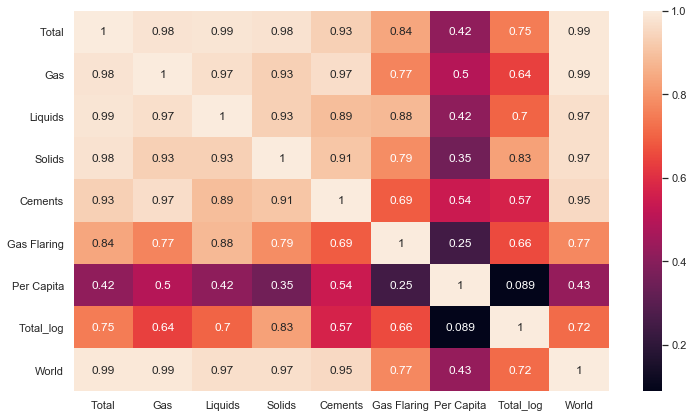

In [145]:
corrMatrix = new.corr()
print (corrMatrix)
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

As you can see, the World data is significantly corelated with Total CO2 Emission which means our 2nd hypothesis answers 'YES' as there is significant relation. So, CO2 can influence Greenhouse. 

# Hypothesis 3

# Third Hypothesis is, Can we give a solution of CO2 Emission?

# In this hypothesis, we are going to simply calculate how many trees will be needed in terms of decreasing CO2 in 2030.

# We know that, A typical hardwood tree can absorb as much as 48 pounds of carbon dioxide per year. 
(Retrieved from)
https://www.co2meter.com/blogs/news/could-global-co2-levels-be-reduced-by-planting-trees

In [154]:
#We fixed a variable called "TreeAbsorb = 48 (Pounds)" for our final calculation. 
TreeAbsorb = 48

In [155]:
#the total amount of CO2 in 2030 (Amount is in Million Metric Tons of CO2)
print(total)

12293.312532854294


We are only taking round value which is 12293

In [156]:
#Lets convert it to numeric (Millions to Decimal)
Numeric_Metric_Tons= 12293*1000000
print(Numeric_Metric_Tons)

12293000000


### Metric Tons (or Tonnes): A unit of weight equal to 1,000 kilograms, or approximately 2,204.6 pounds.
### Refernce: https://www.metric-conversions.org/weight/metric-tons-to-pounds.htm

In [157]:
#Lets convert it to pounds
PoundCO2= 12293000000*2204.6
print(PoundCO2)

27101147800000.0


In [159]:
#Find out the number of trees 
#Equation = Number of CO2 (Pounds)/A Tree Absortion (Pounds)
Num_of_Trees = PoundCO2/TreeAbsorb
print(Num_of_Trees)

564607245833.3334


# So, this is the total number of Trees, we need in the year 2030 to reduce the predicted amount of Global CO2 Emission.

<img src="https://image.freepik.com/free-vector/family-gardening-parents-with-kids-during-trees-planting-care-flowers-blue-background_1284-31108.jpg">